# <font color='black'>Driver Behavior TPIIS</font>


In [1]:
'''
Bibliotecas e Módulos
'''
#Bibliotecas
import pandas as pd
import pickle
from matplotlib import pyplot

In [2]:
'''
Dataset
'''
#Carregar Dataset
dataset = pd.read_csv('driverbehavior.csv')

'''
Window
'''
window = 25

In [3]:
#dataset

In [4]:
rolling = dataset['GyroX'].rolling(window)
rolling

Rolling [window=25,center=False,axis=0]

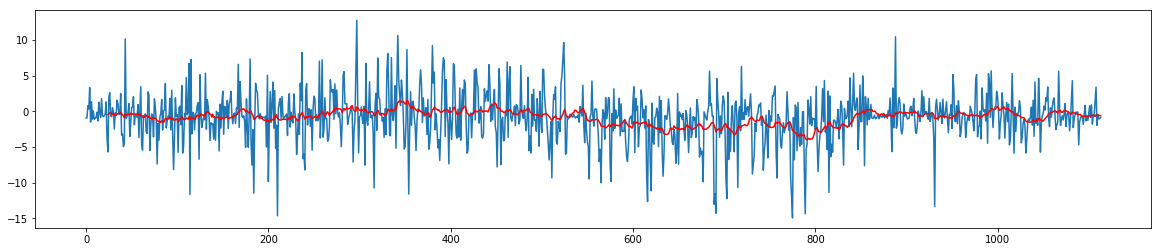

In [5]:
rolling_mean = rolling.mean()

pyplot.figure(figsize=(20,4))

dataset['GyroX'].plot()
rolling_mean.plot(color='red')
pyplot.show()

In [6]:
def createNewDataset(dataset, window):
    sensors = ['Gyro', 'Acc']
    types = ['Mean', 'Min', 'Max', 'Std']
    axis = ['X', 'Y', 'Z']
    
    for i in range(len(sensors)):        
        for j in range(len(types)):            
            for k in range(len(axis)):
                rolling = dataset[sensors[i]+axis[k]].rolling(window)
                
                if(types[j] == 'Mean'):
                    rolling = rolling.mean()
                elif(types[j] == 'Min'):        
                    rolling = rolling.min()
                elif(types[j] == 'Max'):
                    rolling = rolling.max()
                elif(types[j] == 'Std'):
                    rolling = rolling.std()
                
                dataset[sensors[i]+types[j]+axis[k]] = rolling
    
    for i in range(len(sensors)):        
        for j in range(len(types)):            
            for k in range(len(axis)):         
                dataset = dataset[pd.notnull(dataset[sensors[i]+types[j]+axis[k]])]
    
    return dataset

In [7]:
dataset = createNewDataset(dataset, window)
#dataset

In [8]:
dataset.to_csv('./dataset-mod/db_w'+str(window)+'.csv',index=False)